In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import preprocessing
import networkx as nx
import string
import scipy.stats as sc

In [2]:
#import data
data = pd.read_csv("cleanData.csv",index_col = 0)
data.head()

,Name,State,Party,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Maryland,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
1,abigail_spanberger,Virginia,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,adam_kinzinger,Illinois,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea
3,adam_schiff,California,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
4,adam_smith,Washington,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea


In [3]:
names = data["Name"]
party =  data["Party"]

In [4]:
repNames = names[party=="Republican"]
demNames = names[party=="Democrat"]

The label encoding below turns every Yea into 1 and every Nay into 2

In [5]:
#label encoder
le = preprocessing.LabelEncoder()
le.fit(data["Bill_10"])
for i in range(1,311):
    data["Bill_"+str(i)] = le.transform(data["Bill_"+str(i)])
print(le.classes_)
data.head()


['Nay' 'Yea']


,Name,State,Party,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Maryland,Democrat,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,1,1,1
1,abigail_spanberger,Virginia,Democrat,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,1,1,1
2,adam_kinzinger,Illinois,Republican,1,0,0,0,1,0,1,...,1,1,0,0,1,1,1,1,1,1
3,adam_schiff,California,Democrat,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,1,1,1
4,adam_smith,Washington,Democrat,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,1,1,1


Code to find the majority vote of each bill and see how many people voted against it

In [6]:
demAgainst = []
for i in range(1,311):
    counter = 0
    demMode = sc.mode(data["Bill_"+str(i)][data["Party"] == "Democrat"])
    for j in data["Bill_"+str(i)][data["Party"] == "Democrat"]:
        if j != demMode[0][0]:
            counter +=1
    demAgainst.append(counter)
np.mean(demAgainst)

3.867741935483871

In [7]:
repAgainst = []
for i in range(1,311):
    counter = 0
    repMode = sc.mode(data["Bill_"+str(i)][data["Party"] == "Republican"])
    for j in data["Bill_"+str(i)][data["Party"] == "Republican"]:
        if j != repMode[0][0]:
            counter +=1
    repAgainst.append(counter)
np.mean(repAgainst)

12.993548387096775

Transpose the data to make it easier to compare congress people and is better for calulation

In [8]:

data = data.drop(["State","Party"], axis =1)
data.head()

,Name,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,1,0,1,1,1
1,abigail_spanberger,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,1,0,1,1,1
2,adam_kinzinger,1,0,0,0,1,0,1,0,0,...,1,1,0,0,1,1,1,1,1,1
3,adam_schiff,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,1,0,1,1,1
4,adam_smith,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,1,0,1,1,1


In [9]:
data = data.T
data.head()

,0,1,2,3,4,5,6,7,8,9,...,428,429,430,431,432,433,434,435,436,437
Name,a_dutch_ruppersberger,abigail_spanberger,adam_kinzinger,adam_schiff,adam_smith,adrian_smith,adriano_espaillat,al_green,al_lawson,alan_lowenthal,...,vicky_hartzler,victoria_spartz,virginia_foxx,warren_davidson,william_keating,william_timmons,young_kim,yvette_clarke,yvette_herrell,zoe_lofgren
Bill_1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bill_2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_3,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_4,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1


In [10]:
data.columns = data.iloc[0]
data = data.drop("Name")
data.head(10)

Name,a_dutch_ruppersberger,abigail_spanberger,adam_kinzinger,adam_schiff,adam_smith,adrian_smith,adriano_espaillat,al_green,al_lawson,alan_lowenthal,...,vicky_hartzler,victoria_spartz,virginia_foxx,warren_davidson,william_keating,william_timmons,young_kim,yvette_clarke,yvette_herrell,zoe_lofgren
Bill_1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bill_2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_3,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_4,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_5,0,0,1,0,0,1,0,0,0,0,...,1,1,1,1,0,1,1,0,1,0
Bill_6,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
Bill_8,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
Bill_9,0,0,0,0,0,1,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0
Bill_10,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1


In [11]:
data.head(10)

Name,a_dutch_ruppersberger,abigail_spanberger,adam_kinzinger,adam_schiff,adam_smith,adrian_smith,adriano_espaillat,al_green,al_lawson,alan_lowenthal,...,vicky_hartzler,victoria_spartz,virginia_foxx,warren_davidson,william_keating,william_timmons,young_kim,yvette_clarke,yvette_herrell,zoe_lofgren
Bill_1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bill_2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_3,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_4,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_5,0,0,1,0,0,1,0,0,0,0,...,1,1,1,1,0,1,1,0,1,0
Bill_6,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
Bill_8,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
Bill_9,0,0,0,0,0,1,0,0,0,0,...,1,0,1,1,0,1,0,0,1,0
Bill_10,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1


Function for making the Jaccard distance matrix. Finds the distance of one preson to everyone else for all people in the data set.

In [12]:
from scipy.spatial.distance import jaccard
def jacMatrix(names, df):
    distances = []
    for i in names:
        person = df[i]
        distance = []
        for j in df.columns:
            distance.append(jaccard(person, df[j]))
            
        distances.append(distance)
    return distances

In [13]:
jacMat = jacMatrix(names, data)

In [15]:
#make a color array corresponding to each person in the data set to represent party
color = []
for i in party:
    if i == "Democrat":
        color.append("blue")
    elif i == "Republican":
        color.append("red")
    

This code uses the distance matrix and networkx to plot all of the congress people based on their distance to everyone else.

Text(0.5, 1.0, 'Democrat and Republican Clusters Based on Jaccard Distance Matrix')

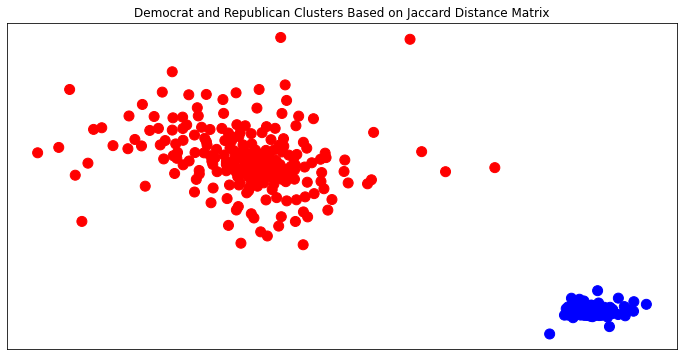

In [18]:
dt = [('len', float)]
A = np.array(jacMat)
A = A.view(dt)

G = nx.from_numpy_matrix(A)

plt.figure(figsize = (12,6))
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='neato')
G.remove_edges_from(list(G.edges()))
G = nx.drawing.nx_pylab.draw_networkx(G,pos=pos,node_size = 100, node_color = color,alpha = 1,with_labels=False)
plt.title("Democrat and Republican Clusters Based on Jaccard Distance Matrix")


# Clustering Algortihm

The Agglomerative Clustering function in sklearn takes in our distance matrix and clusters the data together with hierarchial clustering. Then the predicted labels are given from the model (They are flipped from the data but it clusters correctly). Finally we can plot out the hierarchial structure to see what the model did.

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')  
cluster.fit_predict(jacMat)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,

In [20]:
y_pred = cluster.labels_

In [21]:

le = preprocessing.LabelEncoder()
le.fit(party)
y = le.transform(party)
y

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [22]:
1 - sum(y == y_pred)

1

In [23]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


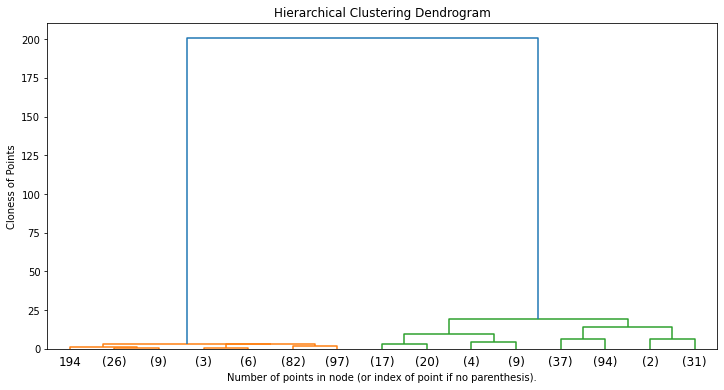

In [26]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(jacMat)
plt.figure(figsize = (12,6))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Cloness of Points")
plt.show()

Show how/what people this is clustering.